# Импорты

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q autokeras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shutil

import autokeras as ak

In [ ]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 200
pd.options.display.width = 200

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/internship_fintech/dataset/processed_dataset.сsv')
print(df.shape)
df.head()

(241683, 43)


,Регион,Город,Популяция,Дата_рожения,Пол,Образование,Должность,Дата_ответа_БКИ,ID_ответа_БКИ,Выдан,Сумма,Тип_кредита,Статус,Срок,Срок_проценты,ПСК,Баланс,Текущая_задолженность,Просрочено,Количество_дней_просрочки,Следующий_платеж,Последний_платеж,Обновлен,Срочная_задолженность_по_займу,Срочная_задолженность_по_процентам,Срочная_задолженность_прочая,Просроченная_задолженность_по_займу,Просроченная_задолженность_по_процентам,Просроченная_задолженность_прочая,Фактические_платежи_за_24_месяца,Объем_обязательства,Сумма_поручительства,Срок_поручительства,Источник_информации,Максимальная_сумма_просроченной_задолженности,Дата_состояния_кредита,Начало_отсчета_дней_просрочки,Тип_задолженности,Сумма_погашенного_основного_долга,Доступность_поддержка,Класс,ПЗ_по_займу/Сумма,МаксПЗ_по_займу/Сумма
0,39,17,29122.0,3774,0,0,7,1043,1629,2647,155740.0,19,7,2527,7185,41.715,66261.2,0.0,0.0,15534,0.0,4174,4033,0.0,0.0,17885.76,145740.27,4211.84,114528.02,0.0,0,0.0,150,0,0.0,5160,2073,0,9999.73,0.0,1,0.935792,0.0
1,39,17,29122.0,3774,0,0,7,1043,1629,3521,5000.0,11,11,3015,7185,0.000,6000.0,0.0,0.0,15534,0.0,2851,1571,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0.0,150,7,0.0,2696,5173,0,5000.00,0.0,1,0.000000,0.0
2,39,17,29122.0,3774,0,0,7,1043,1629,3532,5000.0,11,11,3037,7185,0.000,7700.0,0.0,0.0,15534,0.0,2879,1599,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0.0,150,7,0.0,2724,5173,0,5000.00,0.0,1,0.000000,0.0
3,39,17,29122.0,3774,0,0,7,1043,1629,3558,5000.0,11,11,3066,7185,0.000,8000.0,0.0,0.0,15534,0.0,2909,1629,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0.0,150,7,0.0,2754,5173,0,5000.00,0.0,1,0.000000,0.0
4,39,17,29122.0,3774,0,0,7,1043,1629,3672,5000.0,11,11,3184,7185,803.000,8700.0,0.0,0.0,15534,0.0,3029,1750,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0.0,150,7,0.0,2875,5173,0,5000.00,0.0,1,0.000000,0.0


# Correlation Matrix with Heatmap

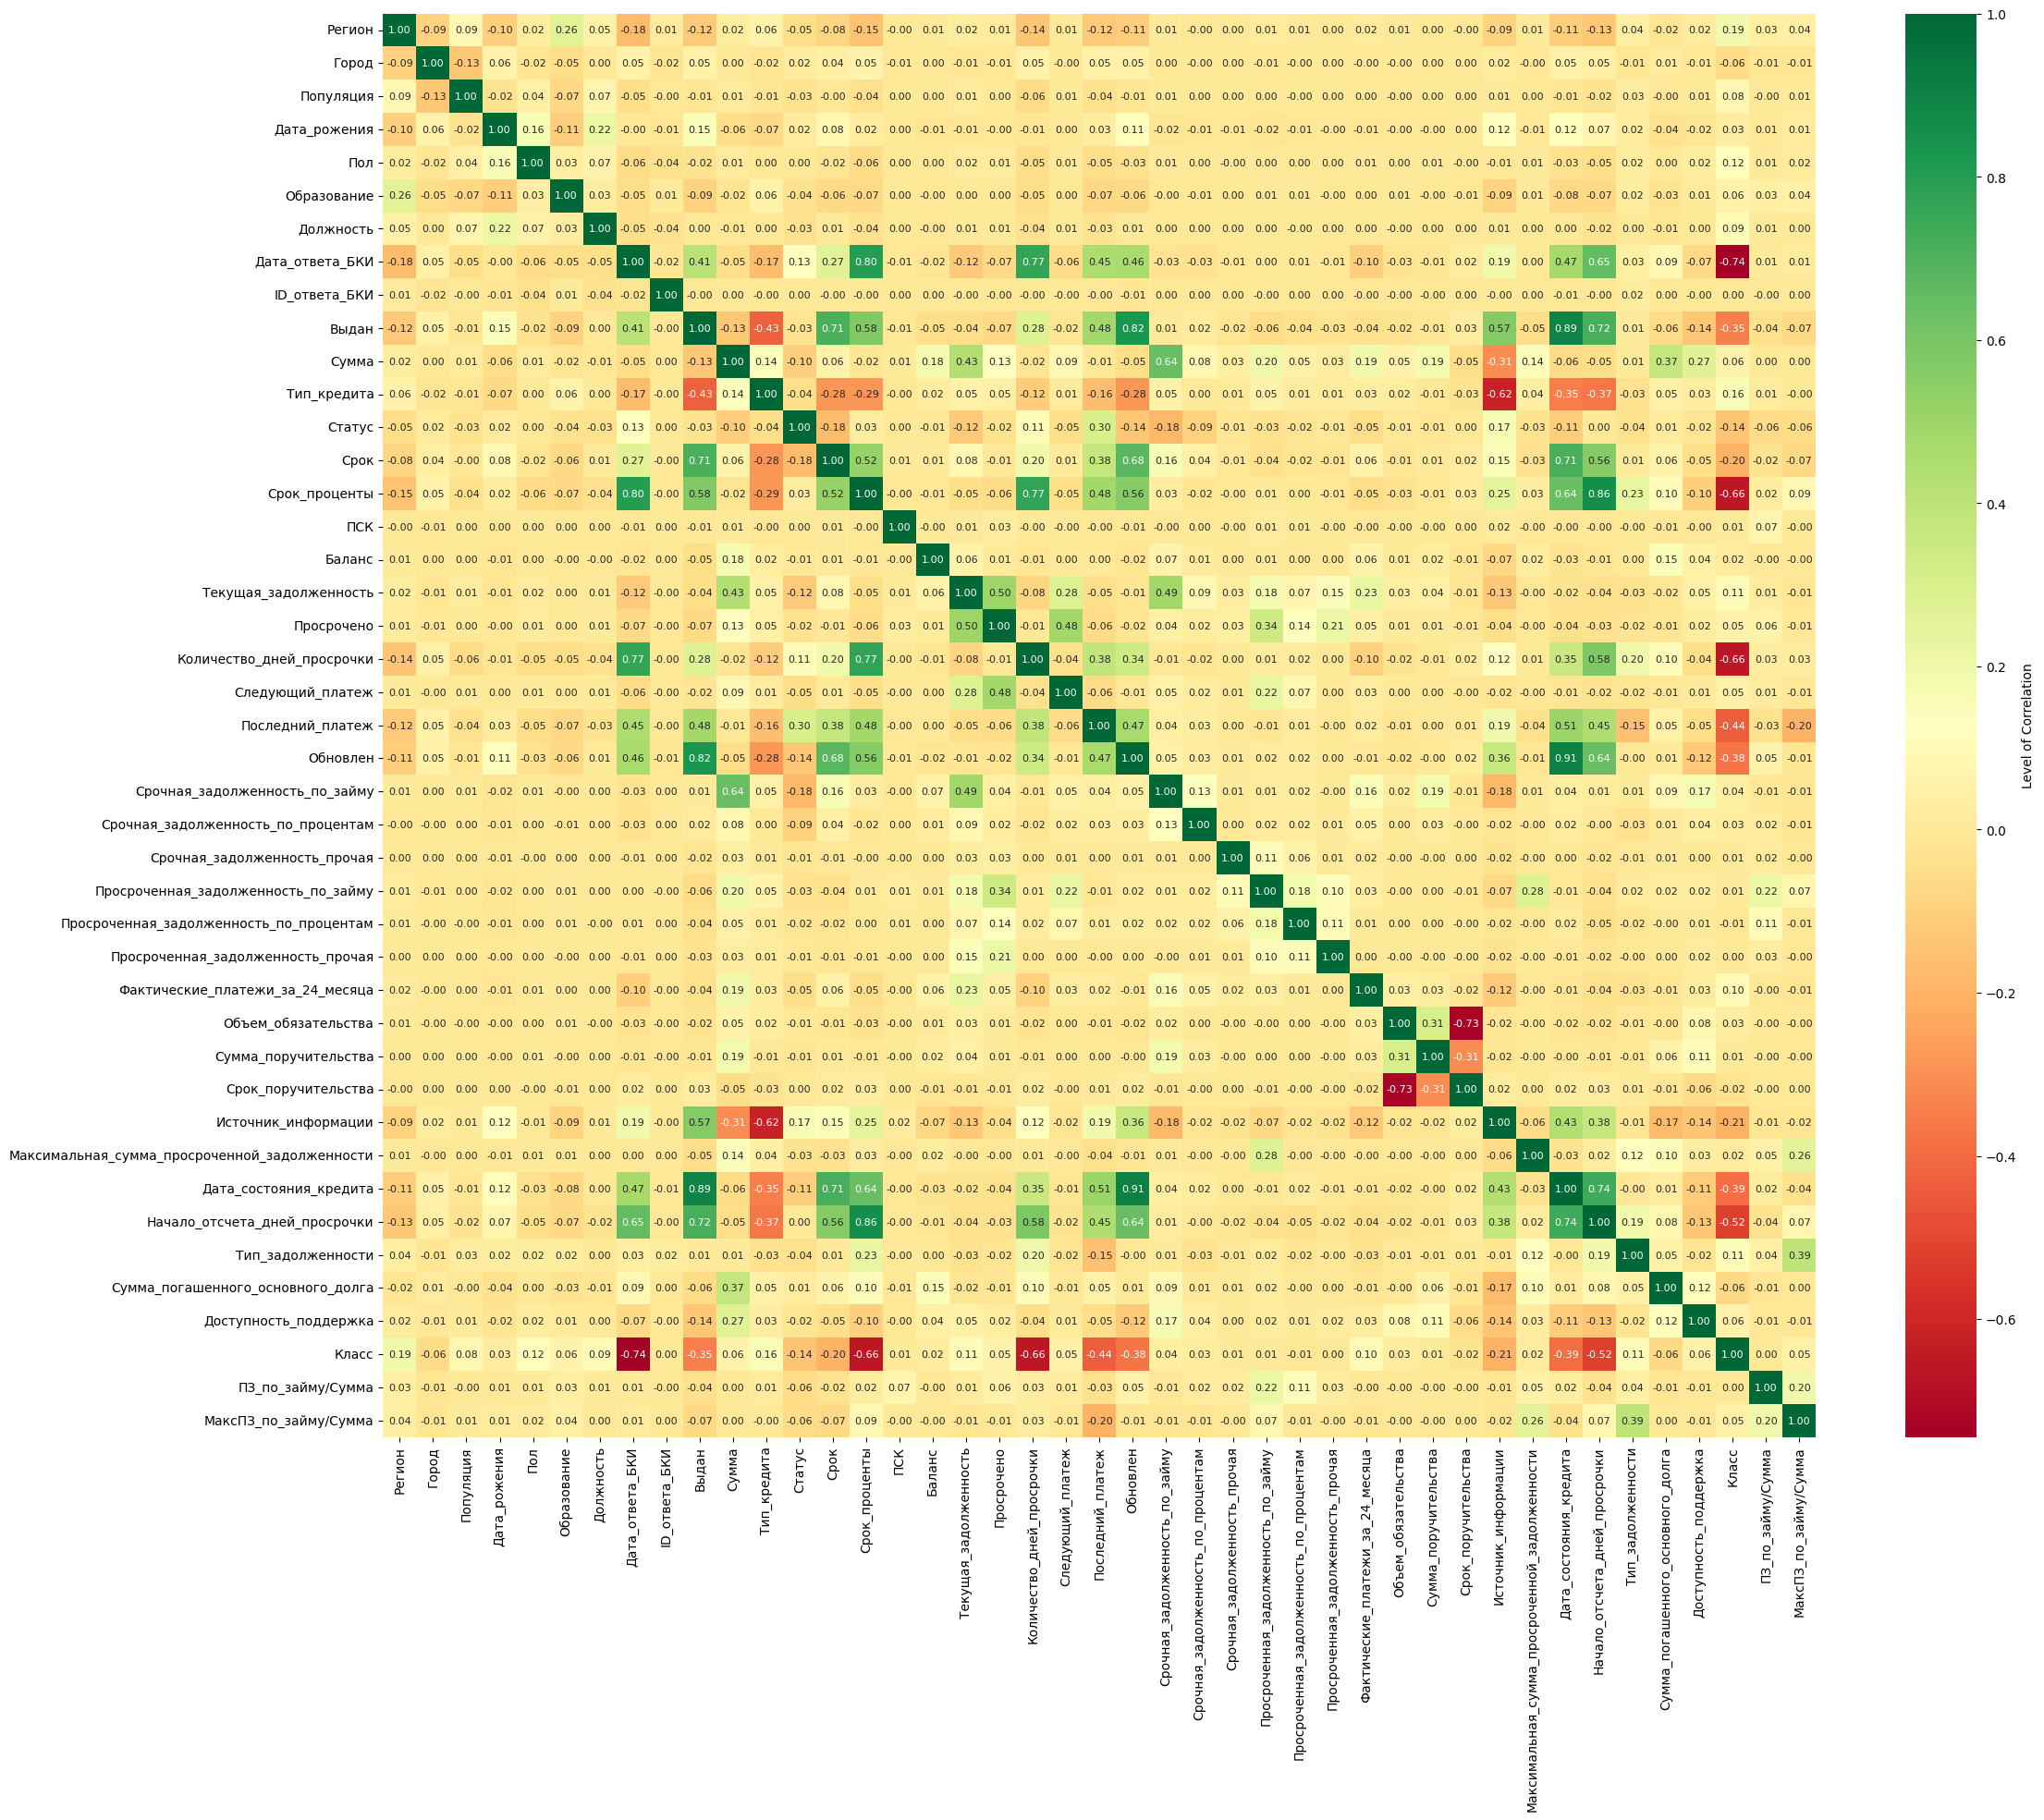

In [ ]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25, 20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, fmt=".2f", cmap="RdYlGn", annot_kws={"size": 8}, cbar_kws={'label': 'Level of Correlation'})
plt.savefig("/content/drive/MyDrive/internship_fintech/sup/correlation_matrix.jpeg")

# Все фичи

In [ ]:
# Разбиваем данные на обучающую и тестовую выборки
X = df.drop('Класс', axis=1)
y = df['Класс']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Создаем модель с помощью AutoKeras
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(X_train, y_train, epochs=10)

# Оцениваем модель
print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Trial 3 Complete [00h 17m 19s]
val_accuracy: 0.8428778648376465

Best val_accuracy So Far: 0.8910319209098816
Total elapsed time: 00h 48m 49s
Epoch 1/10
6043/6043 [==============================] - 57s 9ms/step - loss: 0.4260 - accuracy: 0.8178
Epoch 2/10
6043/6043 [==============================] - 57s 9ms/step - loss: 0.3722 - accuracy: 0.8412
Epoch 3/10
6043/6043 [==============================] - 55s 9ms/step - loss: 0.3405 - accuracy: 0.8567
Epoch 4/10
6043/6043 [==============================] - 53s 9ms/step - loss: 0.3160 - accuracy: 0.8685
Epoch 5/10
6043/6043 [==============================] - 54s 9ms/step - loss: 0.2958 - accuracy: 0.8782
Epoch 6/10
6043/6043 [==============================] - 55s 9ms/step - loss: 0.2797 - accuracy: 0.8852
Epoch 7/10
6043/6043 [==============================] - 55s 9ms/step - loss: 0.2666 - accuracy: 0.8909
Epoch 8/10
6043/6043 [==============================] - 56s 9ms/step - loss: 0.2565 - accuracy: 0.8953
Epoch 9/10
6043/6043 [============

Было 87,9% Стало 0.8910%

# FeatureSelection

## Отбор фичей f_classif

#### Топ 15 f_classif

In [ ]:
df_features = df.drop('Класс', axis=1)
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(df_features, df['Класс'])

mask = selector.get_support()
new_features_15 = df_features.columns[mask]

with open('/content/drive/MyDrive/internship_fintech/sup/selected_features_15_f_classif.txt', 'w') as f:
    for item in new_features_15:
        f.write("%s\n" % item)

In [ ]:
X = df.drop('Класс', axis=1)
X = X[new_features_15]
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(X_train, y_train, epochs=10)

print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Epoch 1/10
6043/6043 [==============================] - 45s 7ms/step - loss: 0.4376 - accuracy: 0.8088
Epoch 2/10
6043/6043 [==============================] - 42s 7ms/step - loss: 0.4129 - accuracy: 0.8203
Epoch 3/10
6043/6043 [==============================] - 44s 7ms/step - loss: 0.4030 - accuracy: 0.8249
Epoch 4/10
6043/6043 [==============================] - 39s 6ms/step - loss: 0.3957 - accuracy: 0.8280
Epoch 5/10
6043/6043 [==============================] - 40s 7ms/step - loss: 0.3899 - accuracy: 0.8308
Epoch 6/10
6043/6043 [==============================] - 42s 7ms/step - loss: 0.3856 - accuracy: 0.8334
Epoch 7/10
6043/6043 [==============================] - 42s 7ms/step - loss: 0.3817 - accuracy: 0.8352
Epoch 8/10
6043/6043 [==============================] - 41s 7ms/step - loss: 0.3783 - accuracy: 0.8367
Epoch 9/10
6043/6043 [==============================] - 41s 7ms/step - loss: 0.3755 - accuracy: 0.8379
Epoch 10/10
1511/1511 [==============================] - 9s 5ms/step - lo

#### Топ 25 f_classif

In [ ]:
df_features = df.drop('Класс', axis=1)
selector = SelectKBest(score_func=f_classif, k=25)
X_new = selector.fit_transform(df_features, df['Класс'])

mask = selector.get_support()
new_features_25 = df_features.columns[mask]

with open('/content/drive/MyDrive/internship_fintech/sup/selected_features_25_f_classif.txt', 'w') as f:
    for item in new_features_25:
        f.write("%s\n" % item)

In [ ]:
X = df.drop('Класс', axis=1)
X = X[new_features_25]
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(X_train, y_train, epochs=10)

print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Epoch 1/10
6043/6043 [==============================] - 45s 7ms/step - loss: 0.4186 - accuracy: 0.8202
Epoch 2/10
6043/6043 [==============================] - 45s 7ms/step - loss: 0.3758 - accuracy: 0.8381
Epoch 3/10
6043/6043 [==============================] - 45s 7ms/step - loss: 0.3516 - accuracy: 0.8498
Epoch 4/10
6043/6043 [==============================] - 44s 7ms/step - loss: 0.3290 - accuracy: 0.8610
Epoch 5/10
6043/6043 [==============================] - 44s 7ms/step - loss: 0.3092 - accuracy: 0.8704
Epoch 6/10
6043/6043 [==============================] - 47s 8ms/step - loss: 0.2930 - accuracy: 0.8776
Epoch 7/10
6043/6043 [==============================] - 44s 7ms/step - loss: 0.2790 - accuracy: 0.8846
Epoch 8/10
6043/6043 [==============================] - 43s 7ms/step - loss: 0.2674 - accuracy: 0.8903
Epoch 9/10
6043/6043 [==============================] - 44s 7ms/step - loss: 0.2574 - accuracy: 0.8946
Epoch 10/10
1511/1511 [==============================] - 9s 6ms/step - lo

#### Сохранение

In [ ]:
# folder_name = "/content/structured_data_classifier"
# shutil.make_archive(folder_name, "zip", folder_name)

## Отбор фичей Chi2

In [ ]:
X = df.drop('Класс', axis=1)                                                    # independent columns
y = df['Класс']                                                                 # target column

In [ ]:
# Убедитесь, что все значения в X неотрицательные
X_non_negative = X.abs()

# Примените SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_non_negative, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Объедините и отобразите 20 лучших признаков
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(20, 'Score'))

                                Specs         Score
2                           Популяция  2.597378e+09
17              Текущая_задолженность  1.655979e+09
29   Фактические_платежи_за_24_месяца  1.020845e+09
16                             Баланс  5.535333e+08
38  Сумма_погашенного_основного_долга  4.252393e+08
18                         Просрочено  4.055559e+08
10                              Сумма  3.914428e+08
19          Количество_дней_просрочки  3.631382e+08
20                   Следующий_платеж  2.949132e+08
23     Срочная_задолженность_по_займу  1.967935e+08


### Top 10 chi2

In [ ]:
X = df.drop('Класс', axis=1)
X = X[featureScores.nlargest(10, 'Score')['Specs']]
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(X_train, y_train, epochs=10)

print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Epoch 1/10
6043/6043 [==============================] - 32s 5ms/step - loss: 0.5687 - accuracy: 0.7964
Epoch 2/10
6043/6043 [==============================] - 32s 5ms/step - loss: 0.5521 - accuracy: 0.8024
Epoch 3/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5476 - accuracy: 0.8031
Epoch 4/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5450 - accuracy: 0.8034
Epoch 5/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5433 - accuracy: 0.8035
Epoch 6/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5422 - accuracy: 0.8036
Epoch 7/10
6043/6043 [==============================] - 31s 5ms/step - loss: 0.5411 - accuracy: 0.8037
Epoch 8/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5401 - accuracy: 0.8037
Epoch 9/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.5392 - accuracy: 0.8038
Epoch 10/10
1511/1511 [==============================] - 7s 4ms/step - lo

## Отбор фичей ExtraTreesClassifier

[4.72177126e-02 4.11612784e-02 4.05791270e-02 4.25892268e-02
 1.62117497e-02 3.46605846e-02 4.35713872e-02 1.71329027e-01
 4.25084749e-02 2.21643407e-02 8.86842655e-03 5.67890712e-03
 9.85518645e-03 1.67396530e-02 7.17781081e-02 9.62723399e-03
 7.71680954e-03 3.22339841e-03 1.97085812e-03 1.42897083e-01
 2.43952171e-03 4.85454469e-02 2.87758284e-02 3.89397326e-03
 2.02682084e-03 7.94109300e-04 1.63550865e-03 8.46790769e-04
 7.71800791e-04 3.27325180e-03 8.71469519e-05 9.06197529e-05
 8.73479764e-05 9.73602800e-03 1.86968057e-03 2.42091000e-02
 4.93867076e-02 3.16622401e-02 3.53860181e-03 9.60627613e-04
 1.99596242e-03 3.02431231e-03]


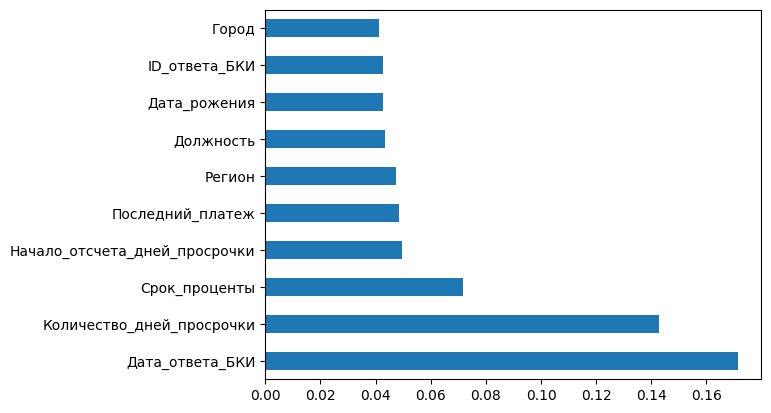

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


X = df.drop('Класс', axis=1)
y = df['Класс']

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Top 10 ExtraTreesClassifier

In [ ]:
X = df.drop('Класс', axis=1)
X = X[feat_importances.nlargest(10).to_dict().keys()]
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = ak.StructuredDataClassifier(max_trials=3)
clf.fit(X_train, y_train, epochs=10)

print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Epoch 1/10
6043/6043 [==============================] - 32s 5ms/step - loss: 0.4620 - accuracy: 0.8083
Epoch 2/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.4124 - accuracy: 0.8256
Epoch 3/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3831 - accuracy: 0.8386
Epoch 4/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3605 - accuracy: 0.8491
Epoch 5/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3429 - accuracy: 0.8574
Epoch 6/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3286 - accuracy: 0.8641
Epoch 7/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3170 - accuracy: 0.8689
Epoch 8/10
6043/6043 [==============================] - 30s 5ms/step - loss: 0.3074 - accuracy: 0.8733
Epoch 9/10
6043/6043 [==============================] - 31s 5ms/step - loss: 0.2993 - accuracy: 0.8768
Epoch 10/10
1511/1511 [==============================] - 7s 4ms/step - lo

### Top 20 ExtraTreesClassifier

In [ ]:
X = df.drop('Класс', axis=1)
X = X[feat_importances.nlargest(20).to_dict().keys()]
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=3,
    metrics = ['accuracy'])

clf.fit(X_train, y_train,
        epochs=10,
        )

print('Loss / Accuracy: ', clf.evaluate(X_test, y_test))

Trial 3 Complete [00h 13m 24s]
val_accuracy: 0.8669289946556091

Best val_accuracy So Far: 0.8840936422348022
Total elapsed time: 00h 38m 13s
Epoch 1/10
1725/6043 [=======>......................] - ETA: 30s - loss: 0.4628 - accuracy: 0.7995

In [ ]:
best_models = clf.tuner.get_best_models(num_models=2)
best_models[0].summary()

In [ ]:
# Сохранение лучшей модели

In [ ]:
with open('/content/drive/MyDrive/internship_fintech/sup/selected_features_20_extra_tree_classifier.txt', 'w') as f:
    for item in feat_importances.nlargest(20).to_dict().keys():
        f.write("%s\n" % item)

# Выводы
1. Максимальная точность составила 0.9134%. Использовали топ 20 столбцов отобранных ExtraTreesClassifier (/content/drive/MyDrive/internship_fintech/sup/selected_features_20_extra_tree_classifier.txt)

# TODO
1. Очистить датасет от выбросов
2. Попробовать autosklearn